Analyse van cleanData

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from datetime import datetime, date

In [53]:
cleanData = pd.read_csv('./data csv/kijkcijfersWeerRaw.csv')
cleanData.sample(10)

,FullDate,date,hour,Kanaal,Programma,Lengte_sec,Kijkers,Temperatuur,Gevoelstemp,Regen,Sneeuw,Weercode,Bewolking,Windsnelheid,Zonnenschijn
58672,2024-11-25 20:42:59,2024-11-25,20,VTM,BLIND GETROUWD,3388,775283,8.8,5.9,0.0,0.0,3.0,100.0,15.3,0.00
4643,2017-05-25 18:29:37,2017-05-25,18,EEN,BLOKKEN,1626,389246,24.5,22.7,0.0,0.0,0.0,0.0,14.2,3600.00
32748,2021-04-18 17:42:17,2021-04-18,17,EEN,CLIP(S),1224,411282,11.7,8.8,0.0,0.0,0.0,8.0,9.6,3600.00
46916,2023-03-31 13:00:03,2023-03-31,13,EEN,HET 1 UUR-JOURNAAL,1624,404306,10.6,5.5,0.7,0.0,53.0,100.0,31.5,0.00
19222,2019-05-25 19:02:43,2019-05-25,19,VTM,NIEUWS 19U VTM,3492,451443,17.3,15.7,0.0,0.0,0.0,10.0,9.7,3600.00
23737,2020-01-07 17:54:53,2020-01-07,17,VTM,BORDER SECURITY (AUS),1351,231864,7.5,3.6,0.0,0.0,1.0,36.0,19.3,1804.04
12323,2018-06-14 20:58:19,2018-06-14,20,EEN,HET GEZIN,2664,624051,17.9,16.5,0.0,0.0,3.0,82.0,17.6,0.00
50976,2023-10-21 18:37:28,2023-10-21,18,VRT 1,VLAANDEREN VAKANTIELAND,1139,337242,13.2,9.1,0.0,0.0,3.0,100.0,28.1,0.00
10285,2018-03-04 16:12:15,2018-03-04,16,EEN,WIELRENNEN. PARIJS-NICE,3345,515940,10.4,7.5,0.2,0.0,51.0,100.0,13.3,0.00
45151,2023-01-02 20:53:15,2023-01-02,20,EEN,HET HUIS,3865,937444,7.0,4.0,0.0,0.0,1.0,35.0,13.4,0.00


is feestdag?, dag van de week?, weekend?, seizoen?

In [54]:
cleanData['date'] = pd.to_datetime(cleanData['date'])

#feestdagen
feestdagen = holidays.BE()
cleanData['isFeestdag'] = cleanData['date'].apply(lambda x: 1 if x in feestdagen else 0)

#dag van de week
cleanData['Weekdag'] = cleanData['date'].dt.weekday

#weekend
cleanData['isWeekend'] = cleanData['Weekdag'].apply(lambda x: 1 if x >= 5 else 0)

#seizoen
def seizoenFinder(datum):
    inputDatum = datum.date()
    Y = inputDatum.year
    seizoenen = {
        'lente': (date(Y, 3, 20), date(Y, 6, 20)),
        'zomer': (date(Y, 6, 21), date(Y, 9, 22)),
        'herfst':   (date(Y, 9, 23), date(Y, 12, 20)),
        'winter': (date(Y, 12, 21), date(Y + 1, 3, 19)),
    }

    for seizoen, (start, end) in seizoenen.items():
        if start <= inputDatum <= end:
            return seizoen
    return 'winter'

cleanData['Seizoen'] = cleanData['date'].apply(seizoenFinder)
cleanData.sample(10)



,FullDate,date,hour,Kanaal,Programma,Lengte_sec,Kijkers,Temperatuur,Gevoelstemp,Regen,Sneeuw,Weercode,Bewolking,Windsnelheid,Zonnenschijn,isFeestdag,Weekdag,isWeekend,Seizoen
35487,2021-09-02 13:00:05,2021-09-02,13,EEN,HET 1 UUR-JOURNAAL,1689,431203,19.4,18.3,0.0,0.0,2.0,67.0,11.0,3600.00,0,3,0,zomer
12444,2018-06-20 17:00:11,2018-06-20,17,EEN,VB. WK. SCHIFT. - URUGUAY/SAOEDI-ARABIE,5766,408318,25.9,25.3,0.0,0.0,0.0,15.0,15.7,3600.00,0,2,0,lente
39068,2022-02-28 20:34:32,2022-02-28,20,PLAY4,DE VERHULSTJES,2917,432459,3.8,0.5,0.0,0.0,0.0,0.0,8.0,0.00,0,0,0,winter
10889,2018-04-02 21:40:34,2018-04-02,21,VTM,DOSSIER X,2750,407610,11.1,7.8,0.2,0.0,51.0,100.0,18.0,0.00,1,0,0,lente
6662,2017-09-03 19:55:53,2017-09-03,19,EEN,PLANEET KUIFJE,1701,676748,18.4,17.0,0.0,0.0,3.0,100.0,10.6,2547.32,0,6,1,zomer
48793,2023-07-04 14:22:11,2023-07-04,14,VRT 1,WIELRENNEN. RONDE VAN FRANKRIJK - RIT 4 DAX>NO...,13826,455333,20.4,17.4,0.2,0.0,51.0,100.0,19.8,3600.00,0,1,0,zomer
54726,2024-04-30 22:16:35,2024-04-30,22,VRT CANVAS,COMEDY CASINO,1796,193112,16.4,16.0,0.0,0.0,3.0,100.0,8.1,0.00,0,1,0,lente
17615,2019-03-05 16:58:15,2019-03-05,16,EEN,WIELRENNEN. DWARS DOOR HAGELAND D. (S.),902,225595,10.3,5.3,0.1,0.0,51.0,53.0,22.6,3600.00,0,1,0,winter
51283,2023-11-05 16:55:16,2023-11-05,16,VRT 1,#WEETIKVEEL,2035,226903,11.7,6.8,0.1,0.0,51.0,20.0,28.7,3600.00,0,6,1,herfst
19941,2019-06-30 19:20:04,2019-06-30,19,EEN,SPORTWEEKEND,2098,541133,23.6,22.5,0.0,0.0,0.0,11.0,15.9,3600.00,0,6,1,zomer


Kijkers per uur in de dag

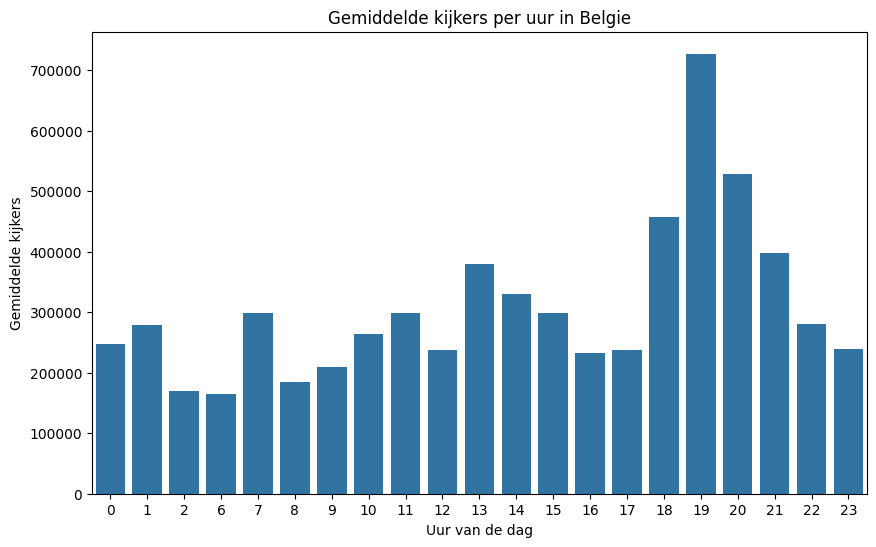

In [ ]:
kijkersPerUur = cleanData.groupby('hour')['Kijkers'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=kijkersPerUur.index, y=kijkersPerUur.values)
plt.xlabel('Uur van de dag')
plt.ylabel('Gemiddelde kijkers')
plt.title('Gemiddelde kijkers per uur in Belgie')
plt.show()

Kijkers per seizoen

In [55]:
#aantal kijkers per seizoen
kijkersPerSeizoen = cleanData.groupby('Seizoen')['Kijkers'].sum()

print(f'Kijkers per seizoen: \n{kijkersPerSeizoen}')

Kijkers per seizoen: 
Seizoen
herfst    7521579970
lente     6519462774
winter    7960906582
zomer     5373446132
Name: Kijkers, dtype: int64


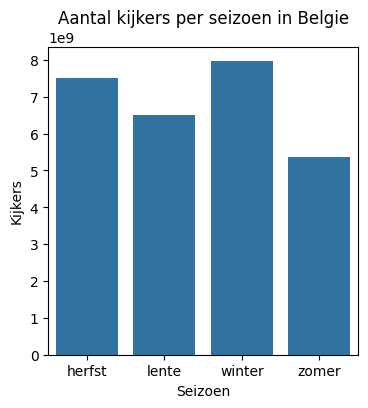

In [56]:
plt.figure(figsize=(4,4))
sns.barplot(x=kijkersPerSeizoen.index, y=kijkersPerSeizoen.values)
plt.xlabel('Seizoen')
plt.ylabel('Kijkers')
plt.title('Aantal kijkers per seizoen in Belgie')
plt.show()

Kijkers per soort dag

In [57]:
avgKijkersFeestdagen = cleanData.groupby('isFeestdag')['Kijkers'].mean()
avgKijkersWeekdag = cleanData.groupby('Weekdag')['Kijkers'].mean()

print(f'Avg Feestdagen: {avgKijkersFeestdagen}\nAvg Weekdagen: {avgKijkersWeekdag}')

Avg Feestdagen: isFeestdag
0    445531.586515
1    458538.024352
Name: Kijkers, dtype: float64
Avg Weekdagen: Weekdag
0    497623.960568
1    479407.740489
2    472217.790474
3    470479.504465
4    416552.898301
5    339553.257510
6    444967.400114
Name: Kijkers, dtype: float64


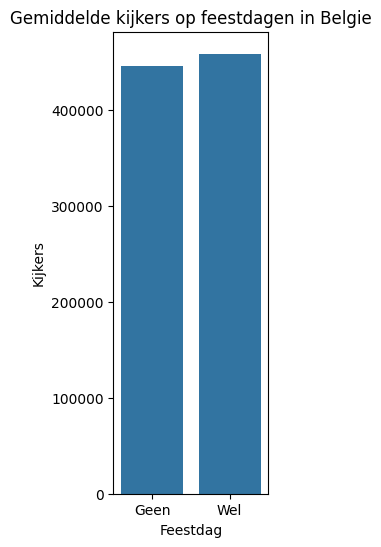

In [58]:
plt.figure(figsize=(2,6))
sns.barplot(x=avgKijkersFeestdagen.index, y=avgKijkersFeestdagen.values)
#x-label aanpassen voor duidelijkere x-as
plt.xticks(ticks=[0,1], labels=["Geen", "Wel"])
plt.xlabel('Feestdag')
plt.ylabel('Kijkers')
plt.title('Gemiddelde kijkers op feestdagen in Belgie')
plt.show()

C:\Users\krist\AppData\Local\Temp\ipykernel_96028\2247902556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avgKijkersWeekdag.index, y=avgKijkersWeekdag.values, palette=kleuren)


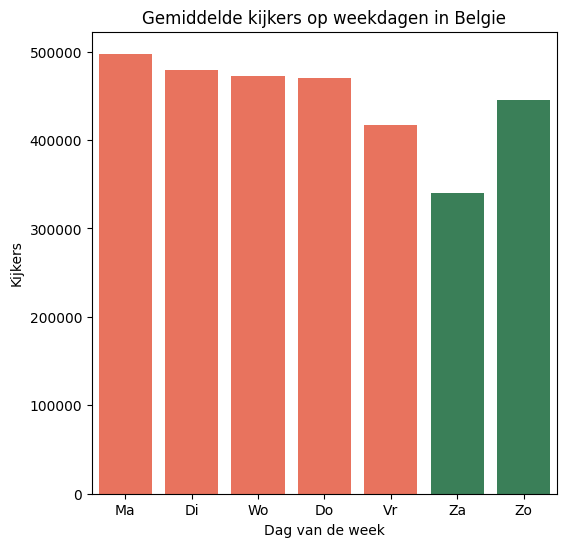

In [59]:
#kleuren om weekend te highlighten
kleuren = ['tomato'] * 5 + ['seagreen', 'seagreen']  # 0–4 rood, 5–6 groen

plt.figure(figsize=(6,6))
sns.barplot(x=avgKijkersWeekdag.index, y=avgKijkersWeekdag.values, palette=kleuren)
#x-label aanpassen voor duidelijkere x-as
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=["Ma", "Di", "Wo", "Do", "Vr", "Za", "Zo"])
plt.xlabel('Dag van de week')
plt.ylabel('Kijkers')
plt.title('Gemiddelde kijkers op weekdagen in Belgie')
plt.show()

Kanalen en Programmas

In [66]:
aantalKanalen = cleanData['Kanaal'].nunique()
aantalProgrammas = cleanData['Programma'].nunique()

print(f'Aantal kanalen: {aantalKanalen}\nAantal programmas: {aantalProgrammas}')

Aantal kanalen: 29
Aantal programmas: 5963


foute waarden

In [61]:
#foute waarde wegdoen
cleanData = cleanData.drop([45668, 52908, 39398])
print(cleanData[cleanData['Programma'] == 'KASTAARS!'])
print(cleanData[cleanData['Programma'] == 'OEKRAINE 12-12'])


                  FullDate       date  hour Kanaal  Programma  Lengte_sec  \
60168  2025-02-08 20:00:05 2025-02-08    20  VRT 1  KASTAARS!        8067   
60172  2025-02-08 20:00:04 2025-02-08    20    VTM  KASTAARS!        8024   

       Kijkers  Temperatuur  Gevoelstemp  Regen  Sneeuw  Weercode  Bewolking  \
60168   807325          6.9          4.8    0.1     0.0      51.0      100.0   
60172   389762          6.9          4.8    0.1     0.0      51.0      100.0   

       Windsnelheid  Zonnenschijn  isFeestdag  Weekdag  isWeekend Seizoen  
60168           6.6           0.0           0        5          1  winter  
60172           6.6           0.0           0        5          1  winter  
Empty DataFrame
Columns: [FullDate, date, hour, Kanaal, Programma, Lengte_sec, Kijkers, Temperatuur, Gevoelstemp, Regen, Sneeuw, Weercode, Bewolking, Windsnelheid, Zonnenschijn, isFeestdag, Weekdag, isWeekend, Seizoen]
Index: []


In [62]:
avgKijkersKanaal = cleanData.groupby('Kanaal')['Kijkers'].mean()

avgKijkersProgramma = cleanData.groupby('Programma')['Kijkers'].mean()

avgKijkersKanaal = avgKijkersKanaal.round(0).astype(int)
avgKijkersProgramma = avgKijkersProgramma.round(0).astype(int)


print(f"Avg Kanaal: {avgKijkersKanaal}\nAvg Programma: {avgKijkersProgramma}")

Avg Kanaal: Kanaal
AB3                       148393
CANVAS                    219845
CAZ                       122847
Canvas                    218190
DAZN PRO LEAGUE 1 (NL)    131902
EEN                       562283
ELEVEN PRO LEAGUE 1 NL    156510
EUROSPORT 1 (NL)          172658
KETNET                    217557
LA UNE                    349349
OP 12                     238122
PLAY SPORTS OPEN          169298
PLAY4                     315016
PLAY5                     148164
PLAY6                     129035
Q2                        229595
RTL-TVI                   304081
TF1                       171059
VIER                      336575
VIJF                      239062
VITAYA                    145021
VRT 1                     499866
VRT CANVAS                217680
VTM                       392064
VTM GOLD                  104603
VTM2                      213169
VTM3                      124617
VTM4                      144825
ZES                       277584
Name: Kijkers, dtype: in

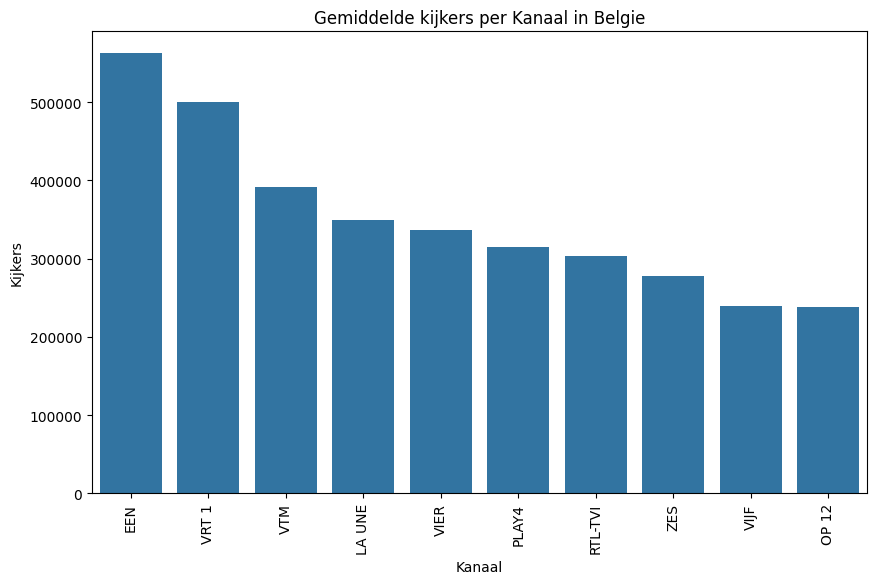

In [63]:
#foute waarden wegdoen

top10Kanaal = avgKijkersKanaal.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10Kanaal.index, y=top10Kanaal.values)
#x-label aanpassen voor duidelijkere x-as
plt.xticks(rotation=90)

plt.xlabel('Kanaal')
plt.ylabel('Kijkers')
plt.title('Gemiddelde kijkers per Kanaal in Belgie')
plt.show()

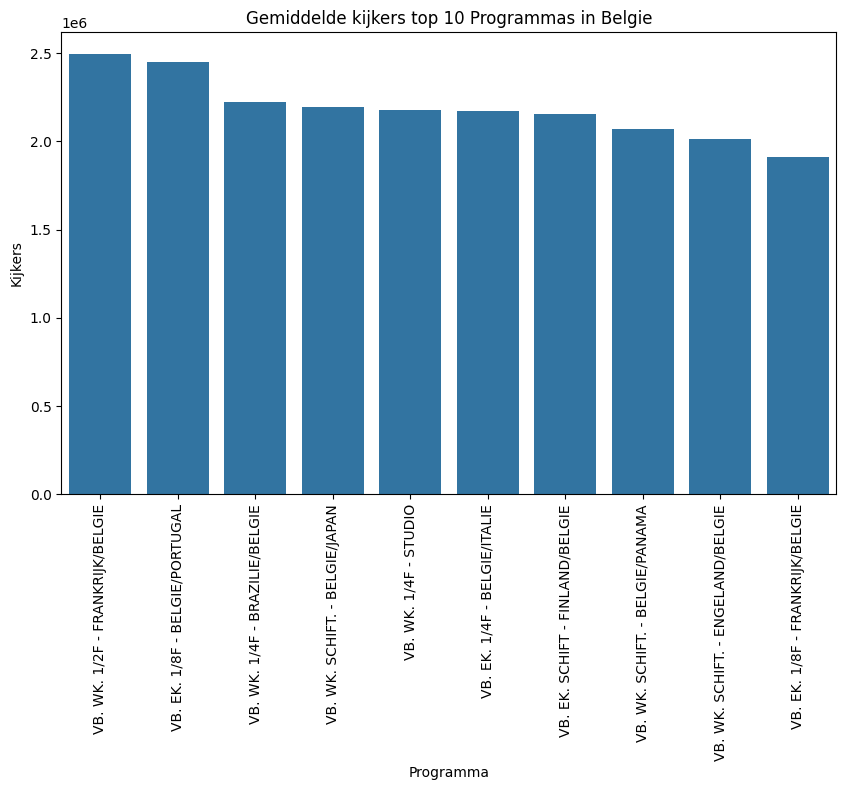

In [67]:
top10Programma = avgKijkersProgramma.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10Programma.index, y=top10Programma.values)
#x-label aanpassen voor duidelijkere x-as
plt.xticks(rotation=90)

plt.xlabel('Programma')
plt.ylabel('Kijkers')
plt.title('Gemiddelde kijkers top 10 Programmas in Belgie')
plt.show()

In [68]:
somKijkersKanaal = cleanData.groupby('Kanaal')['Kijkers'].sum()

somKijkersProgramma = cleanData.groupby('Programma')['Kijkers'].sum()

somKijkersKanaal = somKijkersKanaal.round(0).astype(int)
somKijkersProgramma = somKijkersProgramma.round(0).astype(int)


print(f"Totaal Kanaal: {somKijkersKanaal}\nTotaal Programma: {somKijkersProgramma}")

Totaal Kanaal: Kanaal
AB3                            148393
CANVAS                      399898055
CAZ                            368542
Canvas                      453180096
DAZN PRO LEAGUE 1 (NL)         527606
EEN                       13382337279
ELEVEN PRO LEAGUE 1 NL       18311649
EUROSPORT 1 (NL)              4316461
KETNET                        6091583
LA UNE                        2096094
OP 12                         3333715
PLAY SPORTS OPEN              1523685
PLAY4                       748792448
PLAY5                        26521352
PLAY6                          645176
Q2                          120537346
RTL-TVI                       1824485
TF1                           1197416
VIER                        824609569
VIJF                         35381155
VITAYA                       31034581
VRT 1                      3527553363
VRT CANVAS                  187857841
VTM                        7473911841
VTM GOLD                       941430
VTM2                        

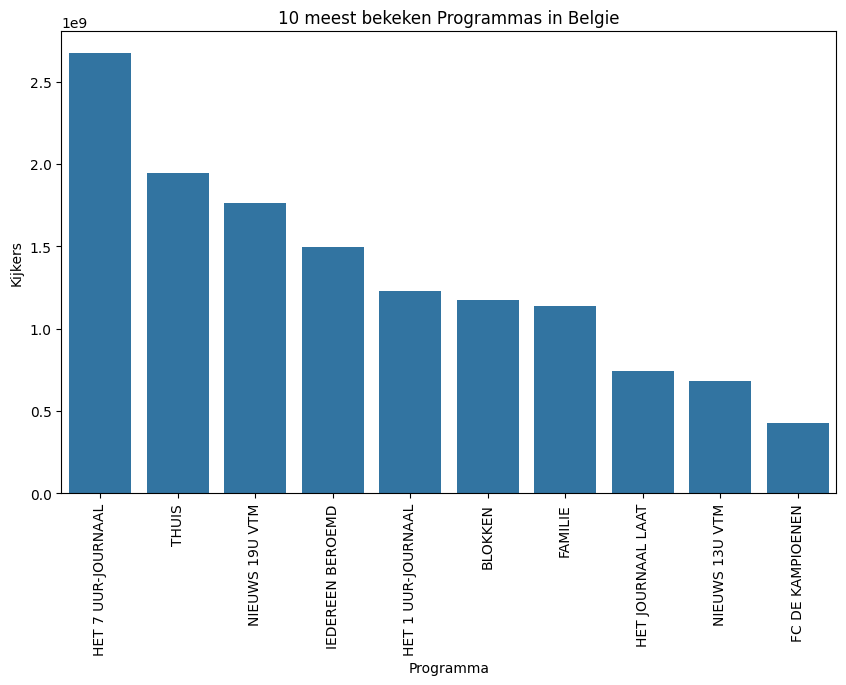

In [70]:
top10Programma = somKijkersProgramma.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10Programma.index, y=top10Programma.values)
#x-label aanpassen voor duidelijkere x-as
plt.xticks(rotation=90)

plt.xlabel('Programma')
plt.ylabel('Kijkers')
plt.title('10 meest bekeken Programmas in Belgie')
plt.show()

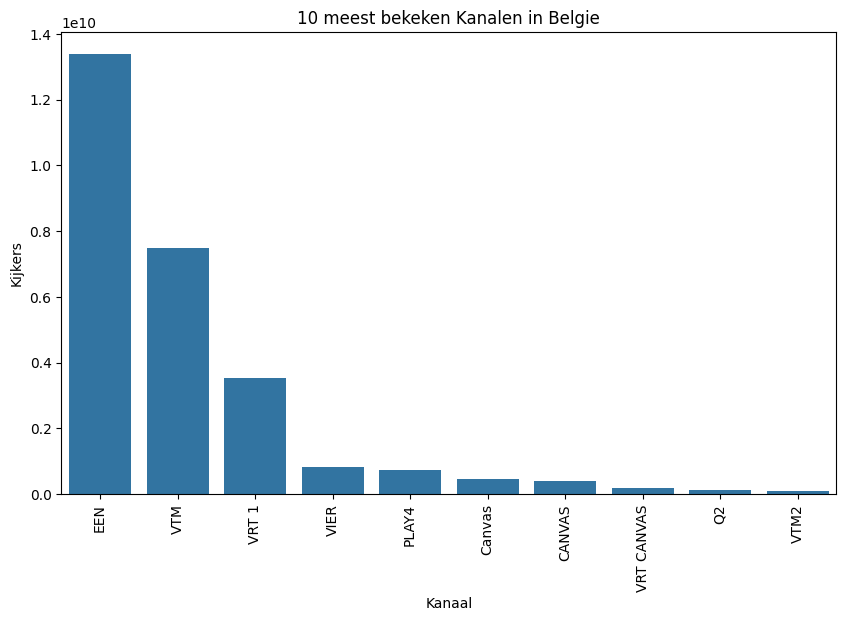

In [71]:
top10Programma = somKijkersKanaal.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10Programma.index, y=top10Programma.values)
#x-label aanpassen voor duidelijkere x-as
plt.xticks(rotation=90)

plt.xlabel('Kanaal')
plt.ylabel('Kijkers')
plt.title('10 meest bekeken Kanalen in Belgie')
plt.show()

Neerslag invloed op kijkers

C:\Users\krist\AppData\Local\Temp\ipykernel_96028\4088114932.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kijkersPerNeerslag = cleanData.groupby(pd.cut(cleanData['Regen'], bins=5))['Kijkers'].mean()


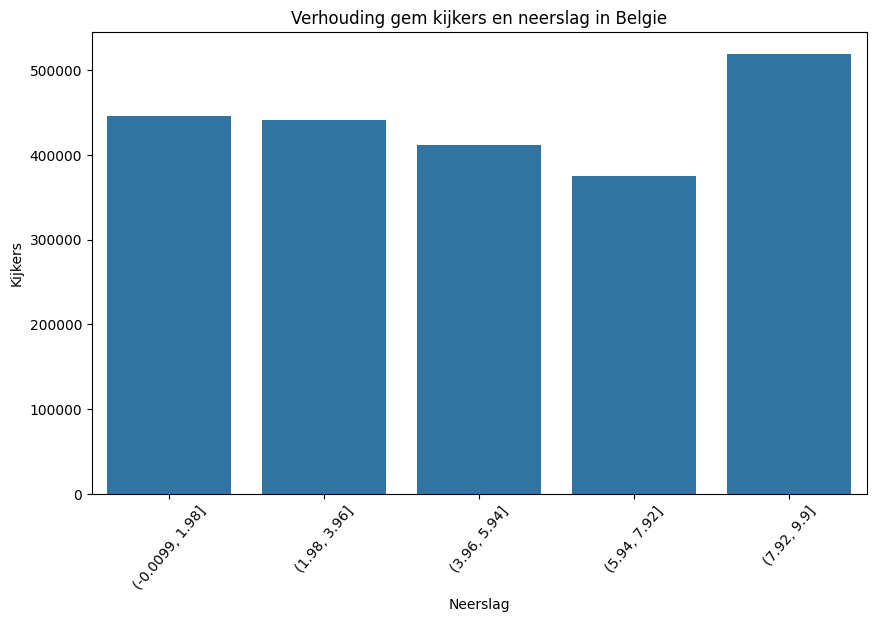

In [79]:
kijkersPerNeerslag = cleanData.groupby(pd.cut(cleanData['Regen'], bins=5))['Kijkers'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=kijkersPerNeerslag.index, y=kijkersPerNeerslag.values)
plt.xlabel('Neerslag')
plt.ylabel('Kijkers')
plt.title('Verhouding gem kijkers en neerslag in Belgie')
plt.xticks(rotation=50)
plt.show()

In [78]:
cleanData['Regen'].sort_values(ascending=False).head(15)

56102    9.9
56096    9.9
56092    9.9
19420    9.7
19421    9.7
48492    7.9
48498    7.9
48507    7.9
56808    7.2
56810    7.2
27863    6.7
27870    6.7
33992    6.6
33983    6.6
35248    6.4
Name: Regen, dtype: float64

Temperatuur en de invloed op kijkcijfers

C:\Users\krist\AppData\Local\Temp\ipykernel_96028\3375153833.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kijkersTemperatuur = cleanData.groupby(pd.cut(cleanData['Temperatuur'], bins=10))['Kijkers'].mean()


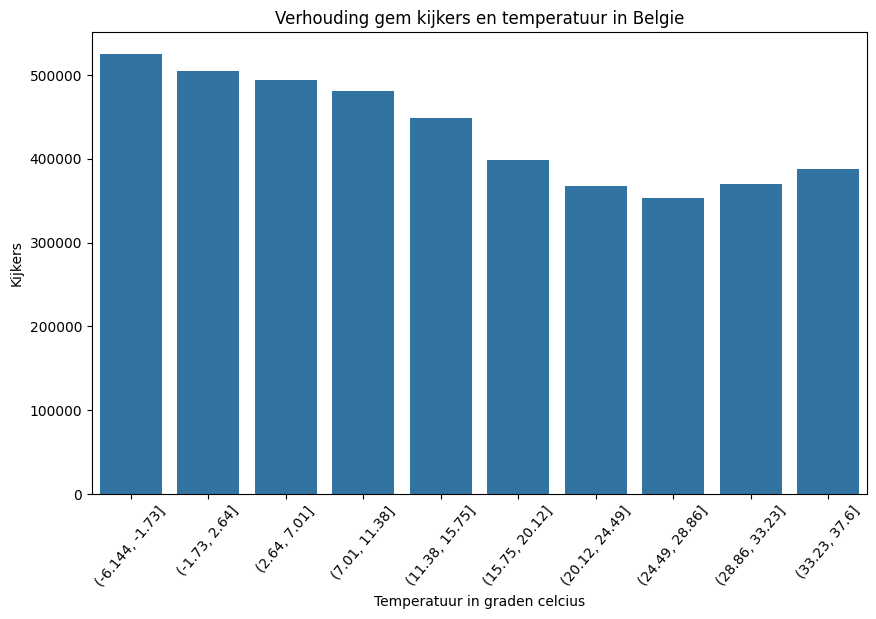

In [82]:
kijkersTemperatuur = cleanData.groupby(pd.cut(cleanData['Temperatuur'], bins=10))['Kijkers'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=kijkersTemperatuur.index, y=kijkersTemperatuur.values)
plt.xlabel('Temperatuur in graden celcius')
plt.ylabel('Kijkers')
plt.title('Verhouding gem kijkers en temperatuur in Belgie')
plt.xticks(rotation=50)
plt.show()

C:\Users\krist\AppData\Local\Temp\ipykernel_96028\294916339.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kijkersGevoelsTemp = cleanData.groupby(pd.cut(cleanData['Gevoelstemp'], bins=10))['Kijkers'].mean()


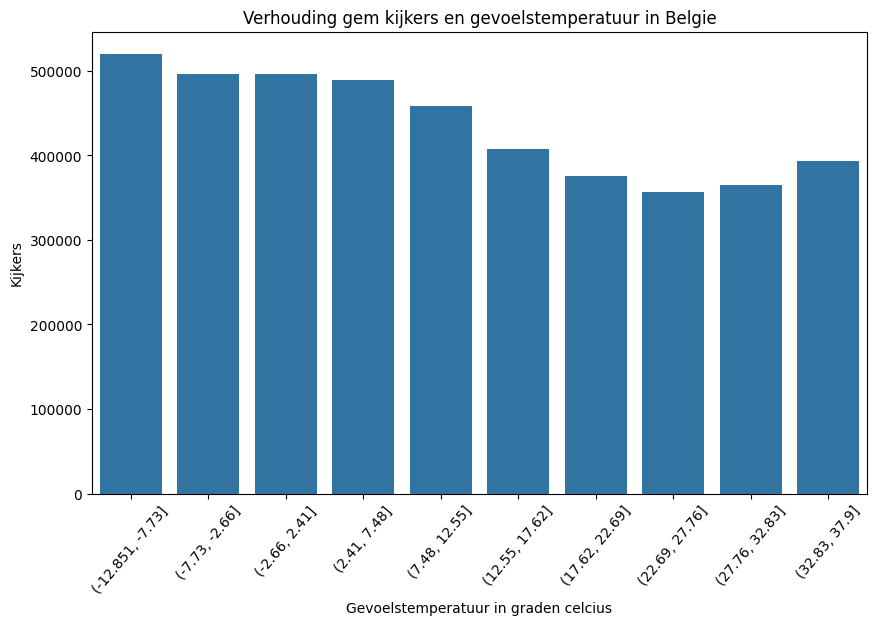

In [83]:
kijkersGevoelsTemp = cleanData.groupby(pd.cut(cleanData['Gevoelstemp'], bins=10))['Kijkers'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=kijkersGevoelsTemp.index, y=kijkersGevoelsTemp.values)
plt.xlabel('Gevoelstemperatuur in graden celcius')
plt.ylabel('Kijkers')
plt.title('Verhouding gem kijkers en gevoelstemperatuur in Belgie')
plt.xticks(rotation=50)
plt.show()